In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
from scipy.io import loadmat
from PIL import Image
import scipy.optimize as opt
from scipy.optimize import minimize
from matplotlib import pyplot

In [3]:
data = loadmat('ex4data1.mat')
X, y = data['X'], data['y'].ravel()
X = np.concatenate([np.ones((y.size , 1)) ,X], axis =1)
m = y.size
df =  pd.DataFrame(X)
dfX =  pd.DataFrame(X)
df['y'] = y

In [4]:
#y = y.reshape(m,1)
#dfy = pd.DataFrame(y)
a=pd.get_dummies(y)
y= a.to_numpy()
y

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [5]:
Theta1 , Theta2 = loadmat('ex4weights.mat')['Theta1'] , loadmat('ex4weights.mat')['Theta2']


In [6]:
    def sigmoid(z):                #sigmoid function
        return 1/(1+np.exp(-z))

In [7]:
def h(theta, X):             #hypothesis function
    return sigmoid(np.dot(X, theta))

In [8]:
nn_param = np.concatenate([Theta1.ravel() , Theta2.ravel()] , axis = 0)

In [9]:
#Cost Function
def cost_fun(theta, X ,y):
    theta1 = np.reshape(theta[:(401*25)] , (25,401))
    theta2 = np.reshape(theta[(401*25):] , (10,26))
    #Forward Propagation
    z1 = h(theta1.T, X)
    a1 = np.concatenate([np.ones((m,1)), z1] , axis = 1)
    a2 = h(theta2.T , a1)
    
    J = ((np.log(a2)*y + (1-y)*np.log(1-a2)).sum())*(-1/m)
    return J

In [10]:
def cost_func_reg(theta, X, y , lambd):
    theta1 = np.reshape(theta[:(401*25)] , (25,401))
    theta2 = np.reshape(theta[(401*25):] , (10,26))
    #Forward Propagation
    z1 = h(theta1.T, X)
    a1 = np.concatenate([np.ones((m,1)), z1] , axis = 1)
    a2 = h(theta2.T , a1)
    
    cost = ((np.log(a2)*y + (1-y)*np.log(1-a2)).sum())*(-1/m)
    J_reg = cost + (np.square(theta1[:,1:]).sum() + np.square(theta2[:,1:]).sum())*(lambd/(2*m))
    
    #Backpropagation
    d2 = a2 -y
    d1 = (np.dot(d2,theta2)*a1*(1-a1))[:,1:]
    delta2 = np.dot(d2.T, a1)
    delta1 = np.dot(d1.T, X)

    D2  = (delta2 + lambd*theta2)/m
    D2[:,0:1] = delta2[:,0:1]/m
    
    D1 = (delta1 + lambd*theta1)/m
    D1[:,0:1] = delta1[:,0:1]/m
    
    d_ravel = np.concatenate([D1.ravel() , D2.ravel()], axis=0)
    
    return J_reg ,d_ravel

In [11]:
def sigmoidGradient(z):
    return sigmoid(z)*(1-sigmoid(z))

#Numerical Gradient
def computeNumericalGradient(J,X,y,lambd, theta, e=1e-4):
    numgrad = np.zeros(theta.shape)
    perturb = np.diag(e * np.ones(theta.shape))
    for i in range(theta.size):
        loss1 = J(theta - perturb[:, i],X,y,lambd)[0]
        loss2 = J(theta + perturb[:, i] , X, y, lambd)[0]
        numgrad[i] = (loss2 - loss1)/(2*e)
    return numgrad

In [12]:
#num_cost = computeNumericalGradient(cost_func_reg,X,y , 1, nn_param)
#num_cost.tolist()

In [13]:
J = lambda p : cost_func_reg(p, X, y , 10)

In [14]:
options = {'maxiter': 1000 , 'disp': True}
res = minimize(J, nn_param , jac = True,  method = 'TNC', options= options)

In [15]:
nn_param = res.x
nn_param

array([ 6.03795630e-01, -1.26475410e-15,  2.62293707e-16, ...,
        1.83304003e-01,  6.14555755e-01, -8.68440526e-01])

In [16]:
cost_func_reg(nn_param, X, y , 10)

(0.9851644543572782,
 array([-3.53486118e-07, -2.52950821e-18,  5.24587414e-19, ...,
         3.06826961e-07,  5.96176950e-07,  1.10065448e-07]))

In [17]:
def final_predict(theta, X, y ):
    theta1 = np.reshape(theta[:(401*25)] , (25,401))
    theta2 = np.reshape(theta[(401*25):] , (10,26))
    #Forward Propagation
    z1 = h(theta1.T, X)
    a1 = np.concatenate([np.ones((m,1)), z1] , axis = 1)
    a2 = h(theta2.T , a1)
    
    return a2.argmax(axis = 1) + 1

In [18]:
final_prefict = final_predict(nn_param, X, y )
final_prefict

array([10, 10, 10, ...,  9,  9,  9])

In [19]:
x_original = data['X']
y_original = data['y'].ravel()
y_original


array([10, 10, 10, ...,  9,  9,  9], dtype=uint8)

In [20]:
def accuracy(hypothesis, y):
    return y[y==hypothesis].size/m

In [21]:
accuracy(final_prefict, y_original)

0.9418

In [32]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Displays 2D data stored in X in a nice grid.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        # Display Image
        h = ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                      cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

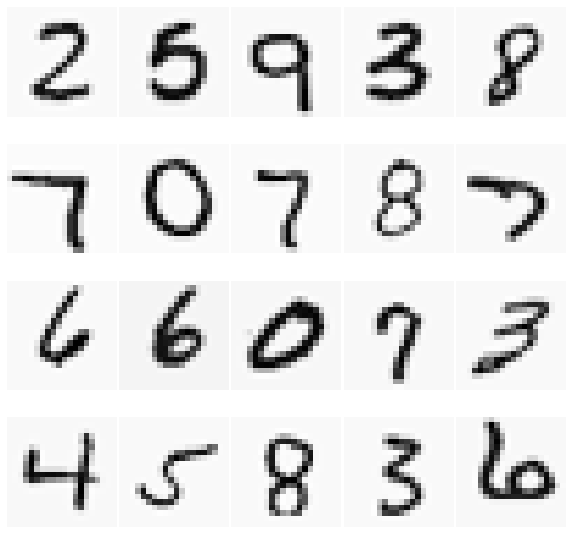

In [33]:
selected_rows = np.random.choice(m ,20 , replace= False)
selected_x = x_original[selected_rows, :]
displayData(selected_x)

In [34]:
def randInitializeWeights(L_in, L_out, epsilon_init=0.12):
    """
    Randomly initialize the weights of a layer in a neural network.
    
    Parameters
    ----------
    L_in : int
        Number of incomming connections.
    
    L_out : int
        Number of outgoing connections. 
    
    epsilon_init : float, optional
        Range of values which the weight can take from a uniform 
        distribution.
    
    Returns
    -------
    W : array_like
        The weight initialiatized to random values.  Note that W should
        be set to a matrix of size(L_out, 1 + L_in) as
        the first column of W handles the "bias" terms.
        
    Instructions
    ------------
    Initialize W randomly so that we break the symmetry while training
    the neural network. Note that the first column of W corresponds 
    to the parameters for the bias unit.
    """

    # You need to return the following variables correctly 
    W = np.zeros((L_out, 1 + L_in))

    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
    
    return W



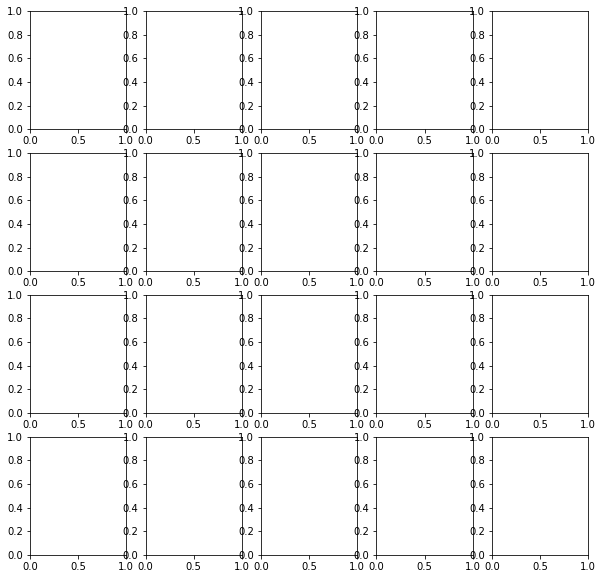

In [35]:
    display_rows = int(np.floor(np.sqrt(20)))
    display_cols = int(np.ceil(20 / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=(10,10))
    

In [43]:
h = ax_array[0,0].imshow(np.random.rand(20,20),cmap='Greys', extent=[0, 1, 0, 1] )
ax_array[0,0].axis('off')

(0.0, 1.0, 0.0, 1.0)

In [131]:
x_original[1].reshape(20,20)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.22856793e-04, -9.1

In [40]:
np.random.rand(20,20)

array([[0.49026671, 0.86313031, 0.64754521, 0.26454669, 0.74353703,
        0.85743917, 0.7992672 , 0.38797745, 0.50696431, 0.13674903,
        0.7688515 , 0.47392419, 0.06277271, 0.60198685, 0.3451113 ,
        0.10869654, 0.64943572, 0.83215064, 0.89162014, 0.87895843],
       [0.38636638, 0.0434137 , 0.67888823, 0.46975097, 0.88019467,
        0.3976795 , 0.92974851, 0.62980593, 0.48327719, 0.06111764,
        0.18721543, 0.30730166, 0.9311813 , 0.03738654, 0.35235   ,
        0.94557343, 0.65895594, 0.37420395, 0.45450522, 0.39317394],
       [0.97137463, 0.23585942, 0.93985378, 0.3953769 , 0.83698881,
        0.62904754, 0.71938043, 0.67920775, 0.64335568, 0.65446686,
        0.3160932 , 0.30557873, 0.99961936, 0.31345374, 0.0668912 ,
        0.56455032, 0.13637689, 0.36739287, 0.60494208, 0.60227766],
       [0.74760217, 0.08687285, 0.89437396, 0.78347701, 0.26590943,
        0.57987167, 0.2204479 , 0.07711755, 0.57030825, 0.04233673,
        0.63821405, 0.71835183, 0.09703357, 0